In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing important modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import re

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, f1_score, precision_score, recall_score, classification_report, accuracy_score
from sklearn.inspection import PartialDependenceDisplay

from xgboost import XGBClassifier

# Importing necessary libraries and modules

[Dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset/data)

In [ ]:
data_path = "/content/drive/MyDrive/MasterCourse Bangladesh/Week 14/adult_income_ds.csv"

df = pd.read_csv(data_path)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Pre-processing data

Executing basic analysis of the dataset

In [ ]:
#Checking for nulls
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Feature Engineering

In [ ]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

def add_features(df): #Adding new features
  df['log-capital-gain'] = np.log10(df['capital-gain'] + 1)
  df['log-capital-loss'] = np.log10(df['capital-loss'] + 1)

  for column in categorical:
    df[column] = pd.Categorical(df[column])
  df['income'] = (df['income'] == ">50K") #Binarizing column

  return

add_features(df)

In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,False,0.000000,0.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,False,0.000000,0.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,True,0.000000,0.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,True,3.885870,0.0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,False,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,False,0.000000,0.0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,True,0.000000,0.0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,False,0.000000,0.0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,False,0.000000,0.0


In [ ]:
target = "income"

continuous = ['age', 'fnlwgt', 'educational-num', 'log-capital-gain', 'log-capital-loss', 'hours-per-week']

In [ ]:
#categorizing values and showing samples here

xx = pd.DataFrame()
xx["Race_head"] = df.race.head()
xx["Race_head_Category"] = df.race.cat.codes.head()

xx

,Race_head,Race_head_Category
0,Black,2
1,White,4
2,White,4
3,Black,2
4,White,4


In [ ]:
#Casting new types (Boolean => Int)

df['income'] = df['income'].astype(int)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.000000,0.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.000000,0.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.000000,0.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,3.885870,0.0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.000000,0.0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.000000,0.0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.000000,0.0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.000000,0.0


#Splitting the dataset

In [ ]:
# np.random.seed(42)

train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

# Converting the entire dataset into numerics

In [ ]:
train_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss
37193,42,Private,145175,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0,0.0,0.0
31093,52,Self-emp-not-inc,175029,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,0,0.0,0.0
33814,34,Local-gov,172664,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,0.0,0.0
14500,28,Private,125791,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0,0.0,0.0
23399,46,Private,28419,Assoc-voc,11,Never-married,Transport-moving,Not-in-family,White,Male,0,0,50,United-States,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,Private,635913,HS-grad,9,Married-spouse-absent,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,0.0,0.0
44732,34,Private,107624,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,0,0.0,0.0
38158,28,Private,250135,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0,0.0,0.0
860,46,State-gov,96652,Assoc-voc,11,Separated,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,0,0.0,0.0


In [ ]:
train_df[categorical] = train_df[categorical].apply(lambda x: x.cat.codes)
train_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss
37193,42,4,145175,15,10,2,7,0,4,1,0,0,40,39,0,0.0,0.0
31093,52,6,175029,0,6,2,3,0,4,1,0,0,35,39,0,0.0,0.0
33814,34,2,172664,11,9,2,3,0,4,1,0,0,40,39,0,0.0,0.0
14500,28,4,125791,11,9,4,1,1,4,0,0,0,40,39,0,0.0,0.0
23399,46,4,28419,8,11,4,14,1,4,1,0,0,50,39,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,4,635913,11,9,3,8,1,2,1,0,0,40,39,0,0.0,0.0
44732,34,4,107624,15,10,2,3,0,4,1,0,0,50,39,0,0.0,0.0
38158,28,4,250135,15,10,0,4,1,4,0,0,0,40,39,0,0.0,0.0
860,46,7,96652,8,11,5,1,4,2,0,0,0,40,39,0,0.0,0.0


In [ ]:
valid_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,0,0.000000,0.0
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,0,0.000000,0.0
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,1,4.156701,0.0
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,0.000000,0.0
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,50,Local-gov,100480,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,1,0.000000,0.0
18798,51,Private,106728,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,60,United-States,1,3.714246,0.0
29519,25,Local-gov,167835,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,38,United-States,1,0.000000,0.0
550,18,Private,170194,11th,7,Never-married,Sales,Own-child,White,Male,0,0,25,United-States,0,0.000000,0.0


In [ ]:
valid_df[categorical] = valid_df[categorical].apply(lambda x: x.cat.codes)
valid_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss
7762,56,4,33115,11,9,0,8,4,4,0,0,0,40,39,0,0.000000,0.0
23881,25,4,112847,11,9,2,14,3,3,1,0,0,40,39,0,0.000000,0.0
30507,43,4,170525,9,13,0,10,1,4,0,14344,0,40,39,1,4.156701,0.0
28911,32,4,186788,11,9,2,14,0,4,1,0,0,40,39,0,0.000000,0.0
19484,39,4,277886,9,13,2,12,5,4,0,0,0,30,39,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,50,2,100480,12,14,2,4,0,4,1,0,0,60,39,1,0.000000,0.0
18798,51,4,106728,9,13,2,4,0,4,1,5178,0,60,39,1,3.714246,0.0
29519,25,2,167835,9,13,2,10,5,4,0,0,0,38,39,1,0.000000,0.0
550,18,4,170194,1,7,4,12,3,4,1,0,0,25,39,0,0.000000,0.0


# ML ALgorithm Implementations

## Binary Splits

**One Rule (OneR) Classifier:** As a simple classifier, it finds exactly one feature (and one or more feature values for that feature) to classify data instances.

In [ ]:
gen_df = pd.DataFrame()
gen_df["Gender"] = df.gender.head()
gen_df["Gender_encoded"] = df.gender.cat.codes.head()
print(gen_df)
print()
print(gen_df["Gender_encoded"].unique())
print()
print(gen_df["Gender_encoded"].nunique())

   Gender  Gender_encoded
0    Male               1
1    Male               1
2    Male               1
3    Male               1
4  Female               0

[1 0]

2


In [ ]:
preds = (train_df.gender == 1)
mean_absolute_error(train_df.income, preds)

# the predictions differ from the true values by 50.2% on average

0.5019834668441123

In [ ]:
work_df = pd.DataFrame()
work_df["Workclass"] = df.workclass.head()
work_df["Workclass_encoded"] = df.workclass.cat.codes.head()

print(work_df)
print()
print(work_df["Workclass_encoded"].unique())
print()
print(work_df["Workclass_encoded"].nunique())

   Workclass  Workclass_encoded
0    Private                  4
1    Private                  4
2  Local-gov                  2
3    Private                  4
4          ?                  0

[4 2 0]

3


In [ ]:
preds_0 = (train_df.workclass == 0)
preds_2 = (train_df.workclass == 2)
preds_4 = (train_df.workclass == 4)

mae_0 = mean_absolute_error(train_df.workclass, preds_0)
mae_2 = mean_absolute_error(train_df.workclass, preds_2)
mae_4 = mean_absolute_error(train_df.workclass, preds_4)

print(mae_0, mae_2, mae_4)

# the predictions differ from the true values by respectively 3.925%, 3.803% and 3.172% on average

3.9250377498528395 3.803137716581783 3.1729583088065927


In [ ]:
race_df = pd.DataFrame()
race_df["Race"] = df.race.head()
race_df["Race_encoded"] = df.race.cat.codes.head()

print(race_df)
print()
print(race_df["Race_encoded"].unique())
print()
print(race_df["Race_encoded"].nunique())

    Race  Race_encoded
0  Black             2
1  White             4
2  White             4
3  Black             2
4  White             4

[2 4]

2


In [ ]:
preds_b = (train_df.race == 2)
preds_w = (train_df.race == 4)

mae_b = mean_absolute_error(train_df.race, preds_b)
mae_w = mean_absolute_error(train_df.race, preds_w)

print(mae_b, mae_w)

# the predictions differ from the true values by respectively 3.577% and 2.814% on average

3.5768177513884267 2.8139891997031197


## Decision Tree Classifier

In [ ]:
def draw_tree(model, df, size=10, ratio=0.6, precision=2, **kwargs):

  viz = export_graphviz(model, feature_names=df.columns, filled=True, rounded=True,
                        special_characters=True, precision=precision, **kwargs)
  return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', viz))

### Demo model

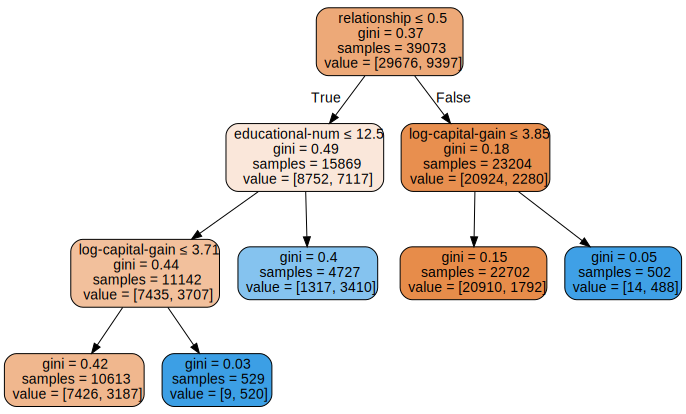

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=5) # Initializing the model
model.fit(train_df[categorical+continuous], train_df[target]) # Training the model

draw_tree(model, train_df[categorical+continuous]) # Creating the visualization fo the model

In [ ]:
preds = model.predict(valid_df[categorical+continuous]) # Making predicitons
mean_absolute_error(valid_df.income, preds)

0.15508240352134303

### Larger model

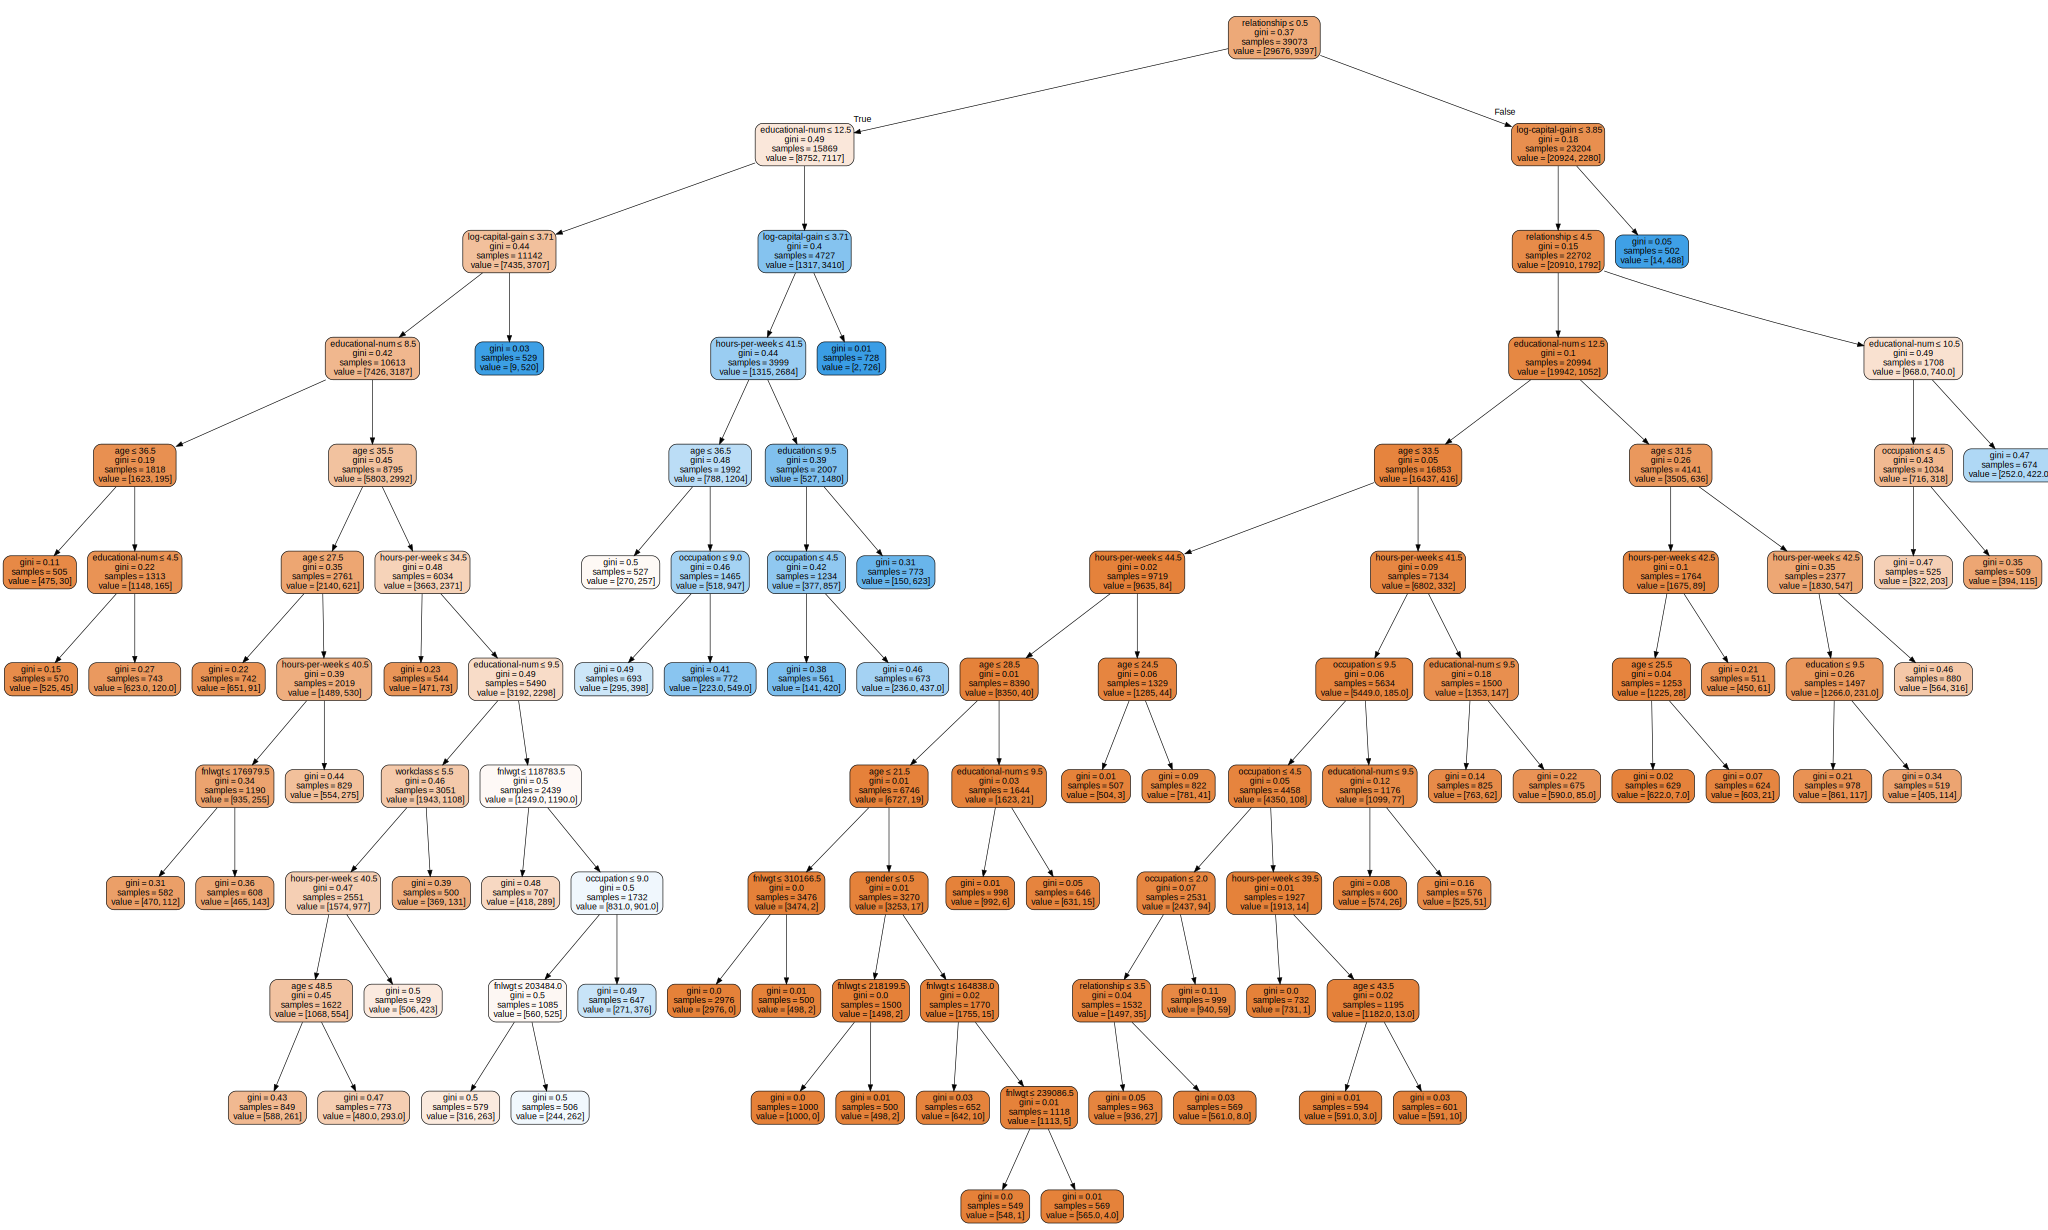

In [ ]:
model = DecisionTreeClassifier(min_samples_leaf=500)  # Initializing the model
model.fit(train_df[categorical+continuous], train_df[target]) # Training the model

draw_tree(model, train_df[categorical+continuous], size=30) # Creating the visualization fo the model

In [ ]:
preds = model.predict(valid_df[categorical+continuous])
mean_absolute_error(valid_df.income, preds)

0.14474357661992016

## Random Forest Classifier

In [ ]:
def build_tree(df, proportion = 0.8):
  total = df.shape[0]
  indices = np.random.choice(total, int(total * proportion))
  return DecisionTreeClassifier(min_samples_leaf=50).fit(df[categorical+continuous].iloc[indices], df[target].iloc[indices])

random_decision_trees = [build_tree(train_df) for idx in range(500)]

In [ ]:
all_probs = [dtc_model.predict(valid_df[categorical+continuous]) for dtc_model in random_decision_trees]
avg_probs = np.stack(all_probs).mean(0)
mean_absolute_error(valid_df.income, avg_probs)

0.1442100522059576

In [ ]:
rf = RandomForestClassifier(500, min_samples_leaf=50)
rf.fit(train_df[categorical+continuous], train_df[target])

RandomForestClassifier(min_samples_leaf=50, n_estimators=500)

In [ ]:
preds = rf.predict(valid_df[categorical+continuous])
mean_absolute_error(valid_df.income, preds)

0.1358378544375064

# Seeing the important features

<Axes: ylabel='cols'>

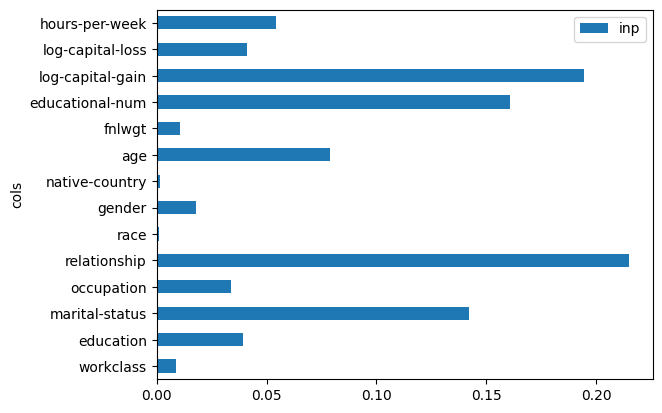

In [ ]:
pd.DataFrame(dict(cols=categorical+continuous, inp=rf.feature_importances_)).plot('cols', 'inp', 'barh')

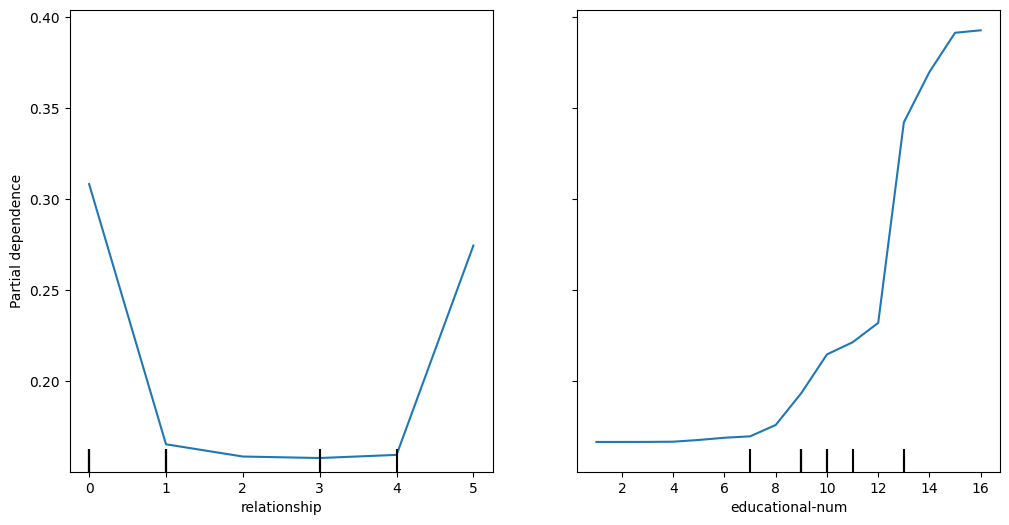

In [ ]:
fix, axs = plt.subplots(figsize=(12,6))
PartialDependenceDisplay.from_estimator(rf, valid_df[categorical+continuous], ['relationship', 'educational-num'], ax=axs);

# Tuning the random forest algorithm using a boosting algorithm (Gradient Boosting)

In [ ]:
xgb_model = XGBClassifier(n_estimators=500, min_child_weight=50)
xgb_model.fit(train_df[categorical+continuous], train_df[target])

XGBClassifier(min_child_weight=50, n_estimators=500)


In [ ]:
preds = xgb_model.predict(valid_df[categorical+continuous])
mean_absolute_error(valid_df.income, preds)

0.12590848602722898